In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from plotnine import *

In [2]:
pbp = pd.read_csv('pbp_clean.csv')
pbp = pbp[pbp['season'] != 2021].reset_index()
pbp.head()

,index,id,game_id,season,date,poss_id,team_id_with_poss,period,seconds_remaining_game_clock,before_event_seconds_remaining_shot_clock,...,coordinate_y,foul_stage,garbage_time_indicator,venue_id,last_free_throw,miss_prob,free_throw_source,previous_event_type,previous_possession_end,expected_points
0,0,4.004968e+11,400496834,2014,2013-11-08,4.004968e+11,120.0,1,1200,35.0,...,0.0,0,0,3559.0,NaN,1.000000,NaN,NaN,Other,0.000000
1,1,4.004968e+11,400496834,2014,2013-11-08,4.004968e+11,120.0,1,1184,19.0,...,4.0,0,0,3559.0,NaN,0.211468,NaN,Jump,Other,1.577065
2,2,4.004968e+11,400496834,2014,2013-11-08,4.004968e+11,41.0,1,1184,35.0,...,0.0,0,0,3559.0,NaN,1.000000,NaN,Missed Shot,DREB,0.000000
3,3,4.004968e+11,400496834,2014,2013-11-08,4.004968e+11,41.0,1,1169,20.0,...,5.0,0,0,3559.0,NaN,0.663663,NaN,DREB,DREB,0.672675
4,4,4.004968e+11,400496834,2014,2013-11-08,4.004968e+11,41.0,1,1169,35.0,...,0.0,0,0,3559.0,NaN,1.000000,NaN,Missed Shot,DREB,0.000000


In [5]:
len(pbp['game_id'].unique())

43212

<AxesSubplot:ylabel='Density'>

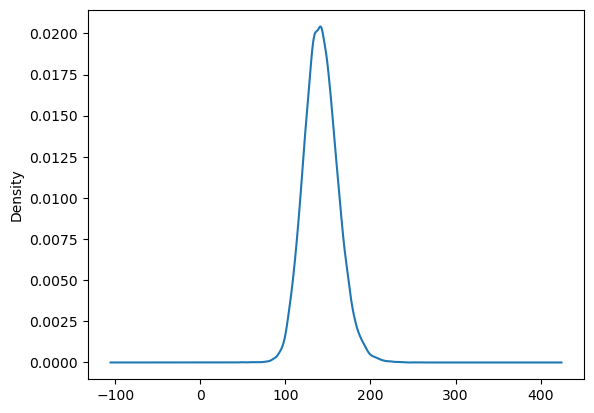

In [7]:
pbp.groupby('game_id')['result_points'].sum().plot.kde()

<AxesSubplot:ylabel='Density'>

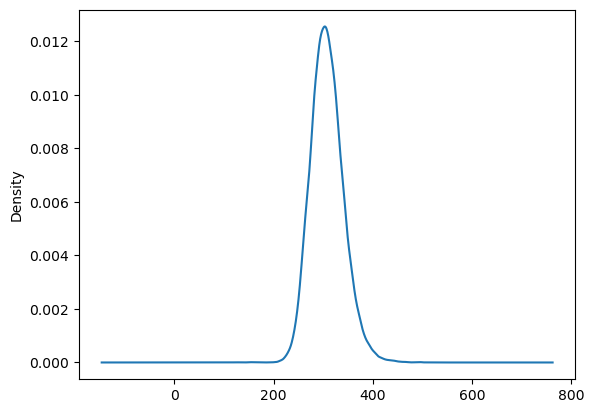

In [9]:
pbp.groupby('game_id').size().plot.kde()

shot_type
Dunk          AxesSubplot(0.125,0.11;0.775x0.77)
Free Throw    AxesSubplot(0.125,0.11;0.775x0.77)
Layup         AxesSubplot(0.125,0.11;0.775x0.77)
Long Two      AxesSubplot(0.125,0.11;0.775x0.77)
Three         AxesSubplot(0.125,0.11;0.775x0.77)
Name: miss_prob, dtype: object

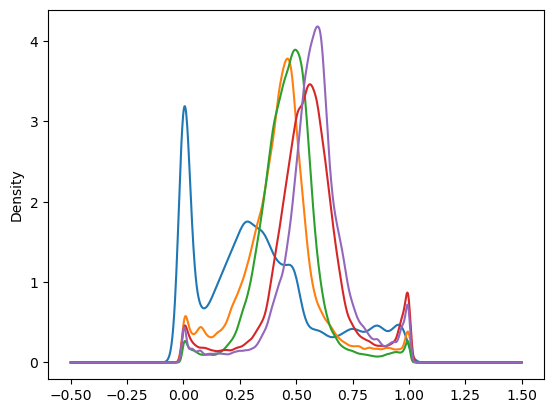

In [3]:
pbp[pbp['shot_type'].isin(['Free Throw', 'Three', 'Layup', 'Dunk', 'Long Two']) & ((pbp['shot_type'] != 'Free Throw') | (pbp['last_free_throw'] & (~pbp['free_throw_source'].isin(['Tech', 'Intentional', 'Flagrant']))))].groupby('shot_type')['miss_prob'].plot.kde()

In [4]:
pbp[pbp['shot_type'].isin(['Free Throw', 'Three', 'Layup', 'Dunk', 'Long Two']) & ((pbp['shot_type'] != 'Free Throw') | (pbp['last_free_throw'] & (~pbp['free_throw_source'].isin(['Tech', 'Intentional', 'Flagrant']))))].groupby('shot_type')['miss_prob'].describe()

,count,mean,std,min,25%,50%,75%,max
shot_type,,,,,,,,
Dunk,160874.0,0.330142,0.267495,0.0,0.110650,0.298286,0.473627,0.999581
Free Throw,933495.0,0.431033,0.176908,0.0,0.342216,0.436069,0.506124,1.000000
Layup,1577131.0,0.463094,0.138436,0.0,0.390064,0.466270,0.531855,1.000000
Long Two,1393899.0,0.548469,0.178857,0.0,0.468124,0.549970,0.628332,1.000000
Three,1804741.0,0.577652,0.163097,0.0,0.510698,0.580533,0.647852,1.000000


In [5]:
pbp[pbp['miss_prob'] == 0].groupby('shot_type').size() / pbp.groupby('shot_type').size()

shot_type
Dunk          0.013483
Free Throw    0.000913
Layup         0.000378
Long Two      0.002544
Three         0.002598
Unknown            NaN
dtype: float64

## Expected Points for Offensive Rebounds

The problem with using expected points is that they don't account for offensive rebounds on made shots, so we need to adjust them slightly up on makes so that they average out close together

In [6]:
pbp.groupby(['shot_type', 'season'])[['expected_points', 'result_points']].mean().reset_index()

,shot_type,season,expected_points,result_points
0,Dunk,2014,1.208337,1.778796
1,Dunk,2015,1.245229,1.772202
2,Dunk,2016,1.251154,1.792578
3,Dunk,2017,1.244089,1.783524
4,Dunk,2018,1.220372,1.790569
5,Dunk,2019,1.228672,1.766631
6,Dunk,2020,1.211321,1.752432
7,Dunk,2022,1.221204,1.759857
8,Free Throw,2014,0.550005,0.696146
9,Free Throw,2015,0.522779,0.687643


In [8]:
from ratings_helpers import adjust_expected_points_for_oreb_prob
adjust_expected_points_for_oreb_prob(pbp).groupby(['shot_type', 'season'])[['expected_points', 'result_points']].mean().reset_index()

,shot_type,season,expected_points,result_points
0,Dunk,2014,1.778796,1.778796
1,Dunk,2015,1.772202,1.772202
2,Dunk,2016,1.792578,1.792578
3,Dunk,2017,1.783524,1.783524
4,Dunk,2018,1.790569,1.790569
5,Dunk,2019,1.766631,1.766631
6,Dunk,2020,1.752432,1.752432
7,Dunk,2022,1.759857,1.759857
8,Free Throw,2014,0.696146,0.696146
9,Free Throw,2015,0.687643,0.687643


In [ ]:
pbp = adjust_expected_points_for_oreb_prob(pbp)

shot_type
Dunk          AxesSubplot(0.125,0.11;0.775x0.77)
Free Throw    AxesSubplot(0.125,0.11;0.775x0.77)
Layup         AxesSubplot(0.125,0.11;0.775x0.77)
Long Two      AxesSubplot(0.125,0.11;0.775x0.77)
Three         AxesSubplot(0.125,0.11;0.775x0.77)
Name: expected_points, dtype: object

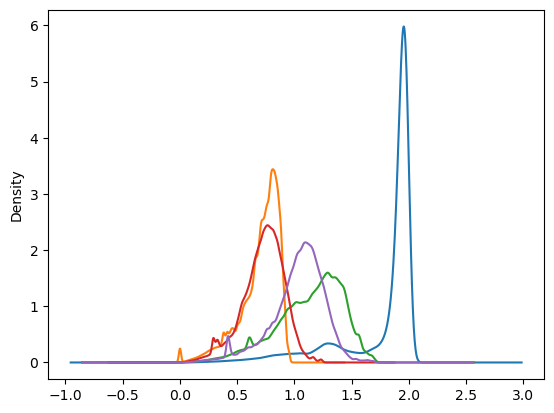

In [ ]:
pbp[pbp['shot_type'].isin(['Free Throw', 'Three', 'Layup', 'Dunk', 'Long Two'])].groupby('shot_type')['expected_points'].plot.kde()

In [ ]:
pbp[pbp['shot_type'].isin(['Free Throw', 'Three', 'Layup', 'Dunk', 'Long Two'])].groupby('shot_type')['expected_points'].describe()

,count,mean,std,min,25%,50%,75%,max
shot_type,,,,,,,,
Dunk,152113.0,1.773562,0.342768,0.030284,1.804825,1.929829,1.964922,1.999999
Free Throw,1692440.0,0.699900,0.174292,0.000000,0.623375,0.745186,0.825154,0.956466
Layup,1577131.0,1.133511,0.289129,0.000000,0.955464,1.184264,1.352211,1.712063
Long Two,1393899.0,0.726457,0.183309,0.000000,0.622847,0.746245,0.851904,1.249799
Three,1804741.0,1.030812,0.234746,0.000000,0.917368,1.065118,1.185679,1.708681


In [ ]:
avgs = pbp.groupby(['shot_type', 'season'])[['expected_points', 'result_points']].mean().reset_index()
totals = pbp.groupby(['shot_type', 'season']).size().reset_index()
totals.columns = ['shot_type', 'season', 'total']
num_adj = pbp[((pbp['shot_type'] != 'Free Throw') | pbp['last_free_throw']) & (pbp['event_type'] == 'Made Shot')].groupby(['shot_type', 'season']).size().reset_index()
num_adj.columns = ['shot_type', 'season', 'num_adj']
agg = avgs.merge(totals, on = ['shot_type', 'season']).merge(num_adj, on = ['shot_type', 'season'])

In [ ]:
agg['value'] = 2
agg.loc[agg['shot_type'] == 'Free Throw', 'value'] = 1
agg.loc[agg['shot_type'] == 'Three', 'value'] = 3

agg['avg_miss_prob'] = 1 - agg['expected_points'].div(agg['value'])
agg['adj'] = (agg['result_points'] - agg['expected_points']).mul(agg['total'].div(agg['num_adj'])).div(agg['avg_miss_prob'])

In [ ]:
pbp = pd.merge(pbp, agg[['season', 'shot_type', 'adj']], on = ['season', 'shot_type'], how = 'left')
pbp.loc[pbp['adj'] != pbp['adj'], 'adj'] = 0
pbp.loc[(pbp['event_type'] == 'Missed Shot') | (~(pbp['last_free_throw']) & (pbp['shot_type'] == 'Free Throw')), 'adj'] = 0

KeyError: 'adj'

In [ ]:
pbp['value'] = 0
pbp.loc[pbp['shot_type'] == 'Free Throw', 'value'] = 1
pbp.loc[pbp['shot_type'].isin(['Dunk', 'Layup', 'Long Two']), 'value'] = 2
pbp.loc[pbp['shot_type'] == 'Three', 'value'] = 3

In [ ]:
pbp['miss_prob'] = 1 - pbp['expected_points'].div(pbp['value'])
pbp['expected_points'] = pbp['expected_points'] + pbp['adj'].mul(pbp['miss_prob'])

In [ ]:
pbp.groupby(['shot_type', 'season'])[['expected_points', 'result_points']].mean().reset_index()

,shot_type,season,expected_points,result_points
0,Dunk,2014,1.762017,1.778796
1,Dunk,2015,1.755622,1.772202
2,Dunk,2016,1.775717,1.792578
3,Dunk,2017,1.767993,1.783524
4,Dunk,2018,1.775573,1.790569
5,Dunk,2019,1.751395,1.766631
6,Dunk,2020,1.737460,1.752432
7,Dunk,2022,1.745746,1.759857
8,Free Throw,2014,0.693830,0.696146
9,Free Throw,2015,0.685267,0.687643


This looks close enough for most, need to iterate doing this for dunks

In [ ]:
# find first TO or shot of possession and designate the type of the first event
first_events = pbp[pbp['event_type'].isin(['Missed Shot', 'Made Shot', 'TO', 'Charge TO'])].groupby('poss_id')[['poss_id', 'event_type', 'shot_type', 'free_throw_source']].head(1)
first_events['first_event'] = first_events['event_type']
first_events.loc[first_events['first_event'].isin(['Missed Shot', 'Made Shot']), 'first_event'] = first_events.loc[first_events['first_event'].isin(['Missed Shot', 'Made Shot']), 'shot_type']
first_events.loc[first_events['first_event'] == 'Free Throw', 'first_event'] = first_events.loc[first_events['first_event'] == 'Free Throw', 'free_throw_source']
first_events.loc[first_events['first_event'] == 'Shooting 3', 'first_event'] = 'Three'
first_events.loc[first_events['first_event'] == 'Shooting 2', 'first_event'] = 'Layup'
first_events.loc[first_events['first_event'] == 'Charge TO', 'first_event'] = 'TO'

# find the time of the first event (need to include fouls this time)
first_events_time = pbp[pbp['event_type'].isin(['Missed Shot', 'Made Shot', 'Charge TO', 'TO', 'Shooting Foul', 'Foul', 'Intentional', 'Flagrant'])].groupby('poss_id')[['poss_id', 'before_event_seconds_remaining_shot_clock', 'season', 'event_type']].head(1)
first_events_time['seconds_elapsed_before_first_event'] = 35 - first_events_time['before_event_seconds_remaining_shot_clock']
first_events_time.loc[first_events_time['season'] >= 2016, 'seconds_elapsed_before_first_event'] = first_events_time.loc[first_events_time['season'] >= 2016, 'seconds_elapsed_before_first_event'] - 5
first_events_time = first_events_time.rename(columns = {'event_type': 'first_event_time'})

# merge together
first_events = pd.merge(first_events[['poss_id', 'first_event']], first_events_time[['poss_id', 'seconds_elapsed_before_first_event', 'first_event_time']], how = 'inner', on = 'poss_id')
first_events.loc[first_events['first_event_time'] == 'Foul', 'seconds_elapsed_before_first_event'] = 30.5 # dummy so that these possessions do not get classified as transition

# group data by possessions
poss = pbp.groupby(
    ['season', 'game_id', 'date', 'poss_id', 'team_id_with_poss', 'previous_possession_end', 'possession_score_differential']
).agg(
    expected_points = ('expected_points', sum),
    result_points = ('result_points', sum),
    garbage_time = ('garbage_time_indicator', max),
    foul_stage = ('foul_stage', max),
    seconds_elapsed = ('seconds_elapsed', sum)
).reset_index()

poss = pd.merge(poss, first_events.drop(columns = ['first_event_time']), how = 'inner', on = 'poss_id')

game_teams = poss[['game_id', 'team_id_with_poss']].drop_duplicates()
opponents = pd.merge(game_teams, game_teams.rename(columns = {'team_id_with_poss': 'opp_id'}), how = 'inner', on = 'game_id')
opponents = opponents[opponents['team_id_with_poss'] != opponents['opp_id']]

poss = pd.merge(poss, opponents, how = 'left', on = ['game_id', 'team_id_with_poss'])

## Transition Cutoffs

In [ ]:
df = poss[
    (poss['foul_stage'] == 0) \
    & (poss['garbage_time'] == 0) \
    & (poss['first_event'].isin(['Dunk', 'Layup', 'Long Two', 'Three', 'TO']))
][['first_event', 'previous_possession_end', 'seconds_elapsed_before_first_event', 'result_points', 'game_id', 'team_id_with_poss']]

df['off_to'] = 0
df['off_dreb'] = 0
df['off_make'] = 0
df.loc[df['previous_possession_end'] == 'TO', 'off_to'] = 1
df.loc[df['previous_possession_end'] == 'DREB', 'off_dreb'] = 1
df.loc[df['previous_possession_end'] == 'Made Shot', 'off_make'] = 1

df['dunk'] = 0
df['layup'] = 0
df['long_two'] = 0
df['three'] = 0
df['close'] = 0
df.loc[(df['first_event'] == 'Dunk') | (df['first_event'] == 'Layup'), 'close'] = 1
df.loc[df['first_event'] == 'Dunk', 'dunk'] = 1
df.loc[df['first_event'] == 'Layup', 'layup'] = 1
df.loc[df['first_event'] == 'Long Two', 'long_two'] = 1
df.loc[df['first_event'] == 'Three', 'three'] = 1
df.head()

,first_event,previous_possession_end,seconds_elapsed_before_first_event,result_points,game_id,team_id_with_poss,off_to,off_dreb,off_make,dunk,layup,long_two,three,close
0,Long Two,Other,16.0,0,400496834,120.0,0,0,0,0,0,1,0,0
1,Long Two,DREB,15.0,0,400496834,41.0,0,1,0,0,0,1,0,0
2,Long Two,DREB,30.5,0,400496834,120.0,0,1,0,0,0,1,0,0
3,TO,DREB,11.0,0,400496834,41.0,0,1,0,0,0,0,0,0
4,TO,Charge TO,8.0,0,400496834,120.0,0,0,0,0,0,0,0,0


In [ ]:
game_avg = df.groupby(['game_id', 'team_id_with_poss'])['result_points'].mean().reset_index().rename(columns = {'result_points': 'ppp'})
df = pd.merge(df, game_avg, on = ['game_id', 'team_id_with_poss'])
df.head()

,first_event,previous_possession_end,seconds_elapsed_before_first_event,result_points,game_id,team_id_with_poss,off_to,off_dreb,off_make,dunk,layup,long_two,three,close,ppp
0,Long Two,Other,16.0,0,400496834,120.0,0,0,0,0,0,1,0,0,1.013889
1,Long Two,DREB,30.5,0,400496834,120.0,0,1,0,0,0,1,0,0,1.013889
2,TO,Charge TO,8.0,0,400496834,120.0,0,0,0,0,0,0,0,0,1.013889
3,Three,Made Shot,25.0,0,400496834,120.0,0,0,1,0,0,0,1,0,1.013889
4,Long Two,Made Shot,26.0,2,400496834,120.0,0,0,1,0,0,1,0,0,1.013889


C:\Users\taylo\AppData\Local\Temp\ipykernel_16568\2807125364.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='seconds_elapsed_before_first_event', ylabel='residual_points'>

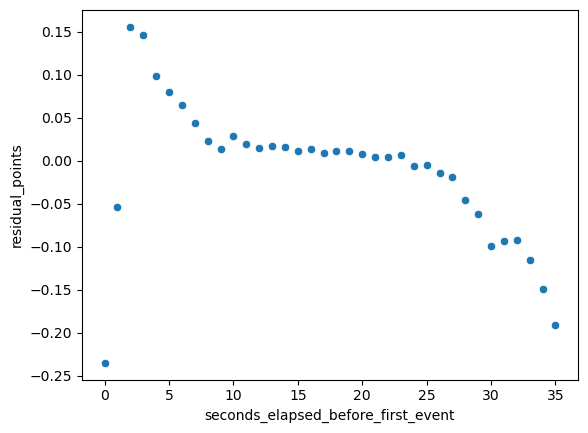

In [ ]:
plot_df = df[
    (df['seconds_elapsed_before_first_event'] != 30.5) \
    & (df['seconds_elapsed_before_first_event'] >= 0) \
    & (df['seconds_elapsed_before_first_event'] <= 35)
]
plot_df['residual_points'] = plot_df['result_points'] - plot_df['ppp']
sns.scatterplot(
    x='seconds_elapsed_before_first_event',y='residual_points',
    data=plot_df.groupby(['seconds_elapsed_before_first_event'])['residual_points'].mean().reset_index()
) 

<AxesSubplot:xlabel='seconds_elapsed_before_first_event', ylabel='residual_points'>

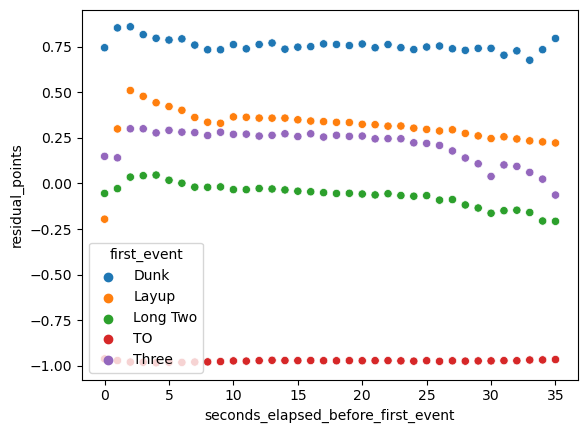

In [ ]:
sns.scatterplot(
    x='seconds_elapsed_before_first_event',y='residual_points',hue ='first_event',
    data=plot_df.groupby(['seconds_elapsed_before_first_event', 'first_event'])['residual_points'].mean().reset_index()
) 

<AxesSubplot:xlabel='seconds_elapsed_before_first_event', ylabel='residual_points'>

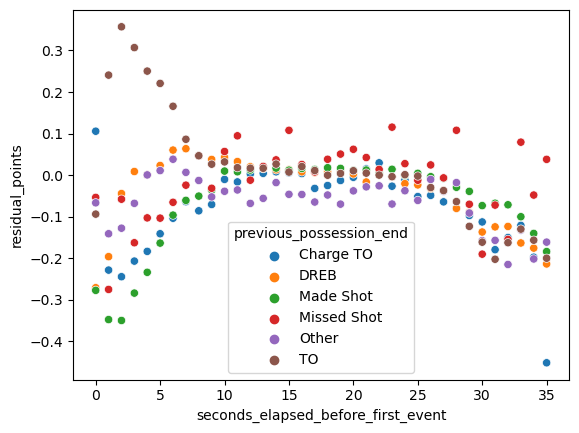

In [ ]:
sns.scatterplot(
    x='seconds_elapsed_before_first_event',y='residual_points', hue = 'previous_possession_end',
    data=plot_df.groupby(['seconds_elapsed_before_first_event', 'previous_possession_end'])['residual_points'].mean().reset_index()
) 

In [ ]:
plot_df.groupby('previous_possession_end').size()

previous_possession_end
Charge TO       109654
DREB           1778268
Made Shot      2430042
Missed Shot      19845
Other            71538
TO              832830
dtype: int64

In [ ]:
plot_df.groupby('first_event').size()

first_event
Dunk         122819
Layup       1671955
Long Two    1090856
TO           894486
Three       1462061
dtype: int64

C:\Users\taylo\AppData\Local\Temp\ipykernel_2040\2236098502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


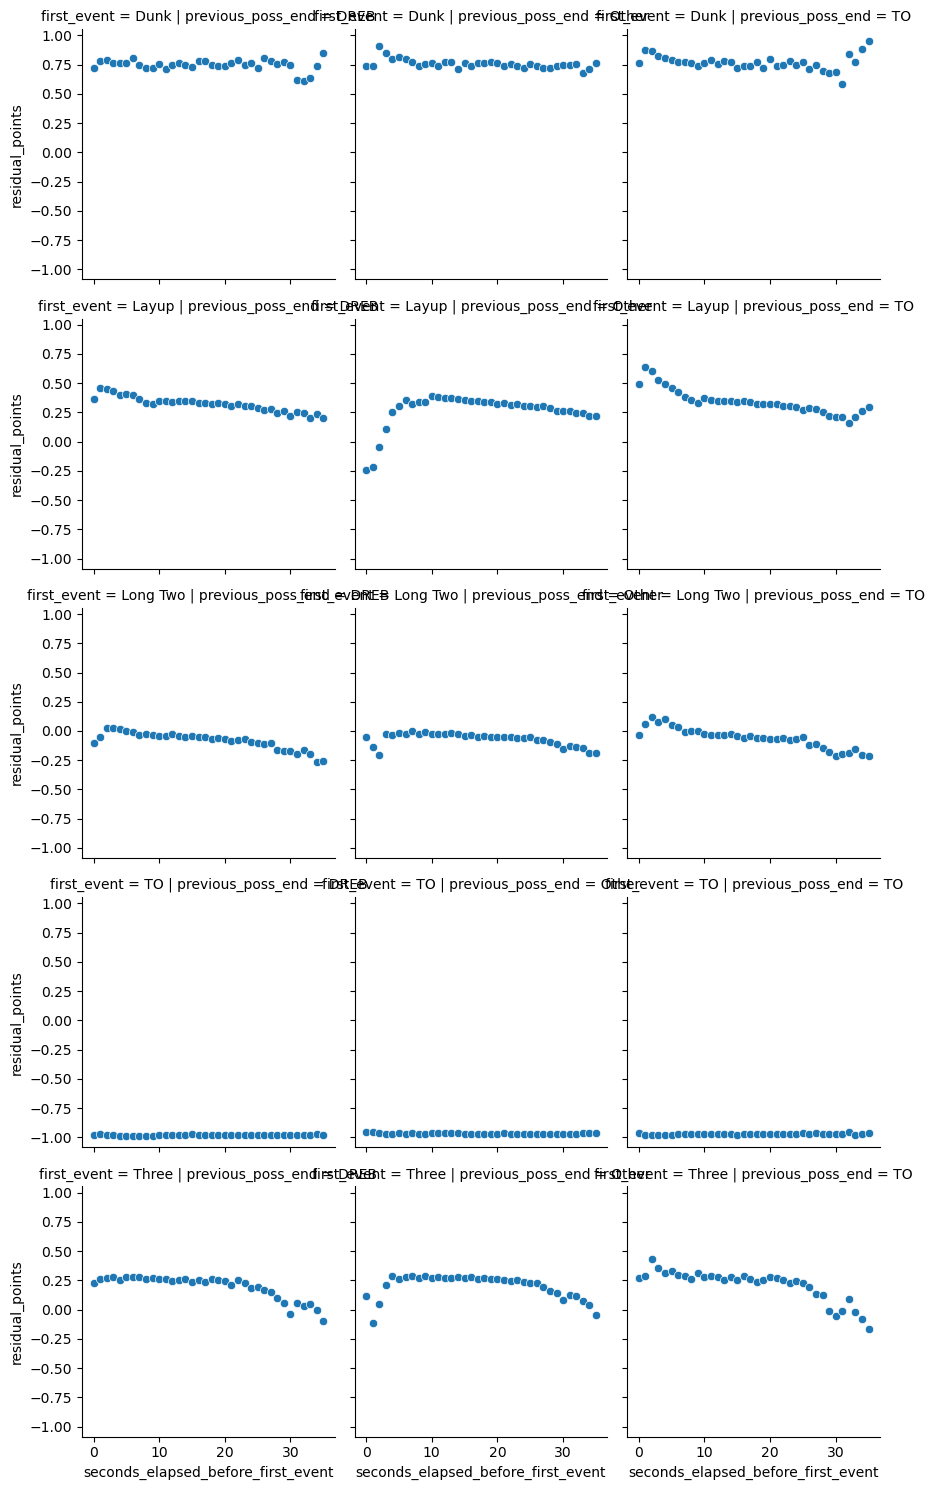

In [ ]:
plot_df['previous_poss_end'] = plot_df['previous_possession_end']
plot_df.loc[~plot_df['previous_possession_end'].isin(['TO', 'DREB']), 'previous_poss_end'] = 'Other'
g = sns.FacetGrid(
    plot_df.groupby(['seconds_elapsed_before_first_event', 'previous_poss_end', 'first_event'])['residual_points'].mean().reset_index(), 
    row="first_event", col="previous_poss_end"
)
g.map(sns.scatterplot, "seconds_elapsed_before_first_event", "residual_points")

<AxesSubplot:xlabel='seconds_elapsed_before_first_event'>

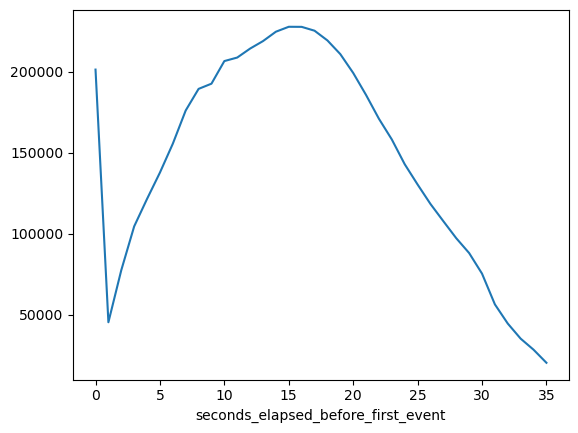

In [ ]:
plot_df.groupby('seconds_elapsed_before_first_event').size().plot()

C:\Users\taylo\AppData\Local\Temp\ipykernel_2040\299779244.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:xlabel='first_event', ylabel='residual_points'>

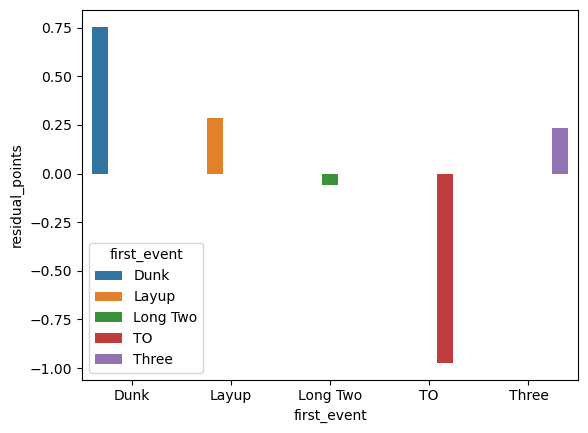

In [ ]:
plot_df = df[
    (df['seconds_elapsed_before_first_event'] > 7) \
    | (df['seconds_elapsed_before_first_event'] <= 0) \
    | (df['previous_possession_end'] != 'TO')
]
plot_df['residual_points'] = plot_df['result_points'] - plot_df['ppp']
sns.barplot(
    x='first_event',y='residual_points', hue = 'first_event',
    data=plot_df.groupby('first_event')['residual_points'].mean().reset_index()
) 

In [ ]:
df['class'] = np.nan
df.loc[(df['seconds_elapsed_before_first_event'] > 0.5) \
        & (df['seconds_elapsed_before_first_event'] < 7.5) \
        & (df['previous_possession_end'] == 'TO'), 'class'] = 'transition'
df.loc[(df['class'] != df['class']) & (df['first_event'] == 'TO'), 'class'] = 'to'
df.loc[(df['class'] != df['class']) & (df['first_event'].isin(['Dunk', 'Layup'])), 'class'] = 'close 2'
df.loc[(df['class'] != df['class']) & (df['first_event'] == 'Long Two'), 'class'] = 'long 2'
df.loc[(df['class'] != df['class']) & (df['first_event'] == 'Three'), 'class'] = '3'

df.groupby('class').size() / len(df)

class
3             0.269751
close 2       0.305031
long 2        0.207646
to            0.163436
transition    0.054136
dtype: float64

In [ ]:
df['residual_points'] = df['result_points'] - df['ppp']
df.groupby('class')['residual_points'].mean()

class
3             0.236051
close 2       0.310712
long 2       -0.059977
to           -0.972798
transition    0.239999
Name: residual_points, dtype: float64

In [ ]:
poss['class'] = np.nan
poss.loc[(poss['seconds_elapsed_before_first_event'] > 0.5) \
        & (poss['seconds_elapsed_before_first_event'] < 7.5) \
        & (poss['previous_possession_end'] == 'TO'), 'class'] = 'transition'
poss.loc[(poss['class'] != poss['class']) & (poss['first_event'] == 'TO'), 'class'] = 'to'
poss.loc[(poss['class'] != poss['class']) & (poss['first_event'].isin(['Dunk', 'Layup'])), 'class'] = 'close 2'
poss.loc[(poss['class'] != poss['class']) & (poss['first_event'] == 'Long Two'), 'class'] = 'long 2'
poss.loc[(poss['class'] != poss['class']) & (poss['first_event'] == 'Three'), 'class'] = '3'
poss.loc[(poss['class'] != poss['class']) | (poss['garbage_time'] == 1) | (poss['foul_stage'] == 1), 'class'] = 'other'

In [ ]:
poss['transition'] = False
poss.loc[poss['class'] == 'transition', 'transition'] = True

### Final Plan

- All seconds before event <= 0 are unreliable
- Transition is off TO, 0.5 < seconds before event < 7.5
- Dunks have too small of sample and layup is next best shot
- 5 classes are transition, TO, close 2, long 2, 3

## Averages Across the Season

Average Pace and points per possession vary across the season. We need to use recent data to predict future data as well as use past years data to predict beginning of season data

In [ ]:
games = pbp[['game_id', 'season', 'date']].drop_duplicates()
endpoints = games.groupby('season').agg(start_date = ('date', 'min'), end_date = ('date', 'max')).to_dict()

In [ ]:
endpoints

{'start_date': {2014: '2013-11-08',
  2015: '2014-11-14',
  2016: '2015-11-13',
  2017: '2016-11-11',
  2018: '2017-11-10',
  2019: '2018-11-06',
  2020: '2019-11-05',
  2022: '2021-11-09'},
 'end_date': {2014: '2014-04-08',
  2015: '2015-04-07',
  2016: '2016-04-05',
  2017: '2017-04-04',
  2018: '2018-04-03',
  2019: '2019-04-09',
  2020: '2020-03-12',
  2022: '2022-04-05'}}

In [ ]:
def count(x):
    return len(x)

game_agg = poss.groupby(
    ['season', 'game_id', 'date']
).agg(
    pbp_total_poss = ('poss_id', count)
).reset_index()

class_agg = poss.groupby(
    ['season', 'game_id', 'date', 'class', 'transition']
).agg(
    class_poss = ('poss_id', count),
    ppp = ('result_points', np.mean),
    expected_ppp = ('expected_points', np.mean)
).reset_index()

class_agg = class_agg.pivot(index = ['season', 'game_id', 'date'], columns = ['class'], values = ['class_poss', 'ppp', 'expected_ppp']).reset_index()
class_agg.columns = [
    'season', 'game_id', 'date', 
    'poss_3', 'poss_close_2', 'poss_long_2', 'poss_other', 'poss_to', 'poss_transition', 
    'ppp_3', 'ppp_close_2', 'ppp_long_2', 'ppp_other', 'ppp_to', 'ppp_transition', 
    'expected_ppp_3', 'expected_ppp_close_2', 'expected_ppp_long_2', 'expected_ppp_other', 'expected_ppp_to', 'expected_ppp_transition'
]

transition_agg = poss.groupby(
    ['season', 'game_id', 'date', 'transition']
).agg(
    avg_seconds_elapsed = ('seconds_elapsed', np.mean)
).reset_index()

transition_agg = transition_agg.pivot(index = ['season', 'game_id', 'date'], columns = 'transition', values = 'avg_seconds_elapsed').reset_index()
transition_agg = transition_agg.rename(columns = {False: 'avg_seconds_no_transition', True: 'avg_seconds_transition'})

In [ ]:
games = pd.read_csv('games_clean.csv')
games['formula_total_poss'] = games['team_poss'] + games['opp_poss']
game_poss = games[['game_id', 'formula_total_poss']]
game_agg = pd.merge(game_agg, game_poss, how = 'inner', on = 'game_id')
game_agg['formula_weight'] = ((abs(game_agg['formula_total_poss'] - game_agg['pbp_total_poss']) - 5) / 10).clip(lower = 0, upper = 1)
game_agg['total_poss'] = game_agg['formula_weight'].mul(game_agg['formula_total_poss']) + (1 - game_agg['formula_weight']).mul(game_agg['pbp_total_poss'])

In [ ]:
agg_df = pd.merge(
    game_agg,
    class_agg,
    on = ['season', 'game_id', 'date']
)

agg_df = pd.merge(
    agg_df,
    transition_agg,
    on = ['season', 'game_id', 'date']
)

agg_df['pct_3'] = agg_df['poss_3'].div(agg_df['pbp_total_poss'])
agg_df['pct_close_2'] = agg_df['poss_close_2'].div(agg_df['pbp_total_poss'])
agg_df['pct_long_2'] = agg_df['poss_long_2'].div(agg_df['pbp_total_poss'])
agg_df['pct_other'] = agg_df['poss_other'].div(agg_df['pbp_total_poss'])
agg_df['pct_to'] = agg_df['poss_to'].div(agg_df['pbp_total_poss'])
agg_df['pct_transition'] = agg_df['poss_transition'].div(agg_df['pbp_total_poss'])

In [ ]:
def percent_finished(row):
    date = datetime.strptime(row['date'], '%Y-%m-%d')
    season = row['season']
    start_date = datetime.strptime(str(endpoints['start_date'][season]), '%Y-%m-%d')
    end_date = datetime.strptime(str(endpoints['end_date'][season]), '%Y-%m-%d')
    total_days = (end_date - start_date).days
    return (date - start_date).days / total_days

agg_df['percent_finished'] = agg_df.apply(percent_finished, axis = 1)

In [ ]:
agg_df['shot_clock'] = agg_df['season'] > 2015

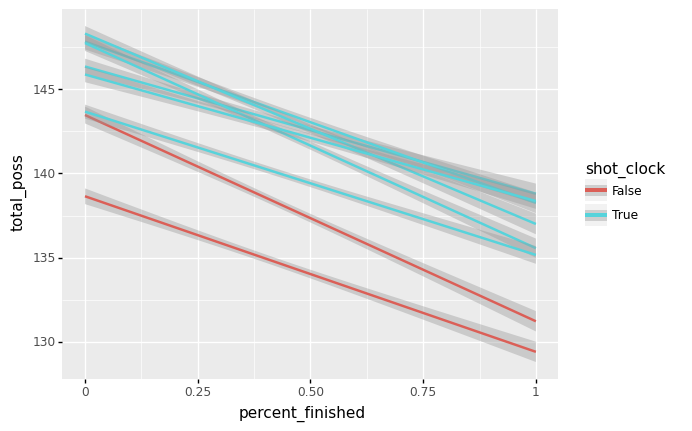

<ggplot: (138170774104)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'total_poss', group = 'season', color = 'shot_clock')) + geom_smooth())

In [ ]:
def previous_poss(date):
    window_start = datetime.strftime(datetime.strptime(date, '%Y-%m-%d') - timedelta(days = 15), '%Y-%m-%d')
    filter_df = agg_df[(agg_df['date'] >= window_start) & (agg_df['date'] < date)]
    return filter_df['total_poss'].mean()

def additive_poss(date, x):
    return previous_poss(date) - x

def multiplicative_poss(date, x):
    return previous_poss(date) / x

def test_date_poss(date):
    type_list = []
    x_list = []
    estimate_list = []
    for x in [0.35, 0.375, 0.4, 0.425]:
        add_poss_estimate = additive_poss(date, x)
        type_list.append('additive')
        x_list.append(x)
        estimate_list.append(add_poss_estimate)
    for x in [1.0025, 1.00275, 1.003]:
        mult_poss_estimate = multiplicative_poss(date, x)
        type_list.append('multiplicative')
        x_list.append(x)
        estimate_list.append(mult_poss_estimate)
    return type_list, x_list, estimate_list

def test_season_poss(season):
    season_df = agg_df[(agg_df['season'] == season) & (agg_df['date'] > str(season - 1) + '-11-30')]
    result_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
    for d in season_df['date'].unique():
        date_df = season_df[season_df['date'] == d]
        if len(date_df) >= 40:
            date_poss = date_df['total_poss'].mean()
            type_list, x_list, estimate_list = test_date_poss(d)
            result_df = pd.concat([result_df, pd.DataFrame({'Date': [d for i in range(len(type_list))],
                                                             'Type': type_list,
                                                             'X': x_list,
                                                             'Estimate': estimate_list,
                                                             'Actual': [date_poss for i in range(len(type_list))]})])
    return result_df

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_poss(s)])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X      
additive        0.35000    0.050134
                0.37500    0.025134
                0.40000    0.000134
                0.42500   -0.024866
multiplicative  1.00250    0.049918
                1.00275    0.014993
                1.00300   -0.019915
Name: error, dtype: float64

In [ ]:
estimate_df.groupby(['Type', 'X'])['squared_error'].mean()

Type            X      
additive        0.35000    4.313105
                0.37500    4.311224
                0.40000    4.310592
                0.42500    4.311210
multiplicative  1.00250    4.311479
                1.00275    4.309060
                1.00300    4.309082
Name: squared_error, dtype: float64

poss = previous 14 day poss / 1.00285

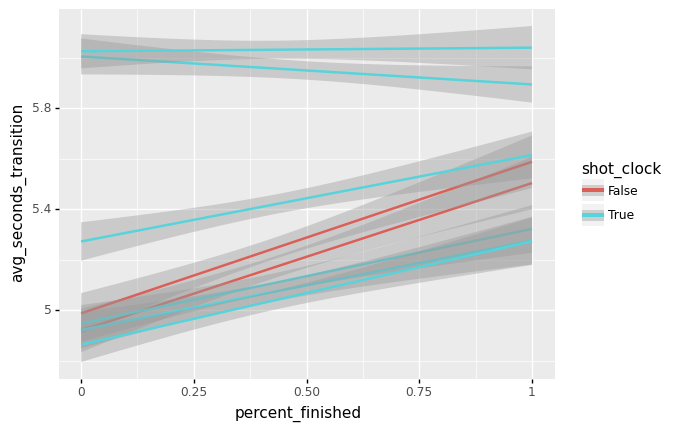

<ggplot: (138091693237)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'avg_seconds_transition', group = 'season', color = 'shot_clock')) + geom_smooth())

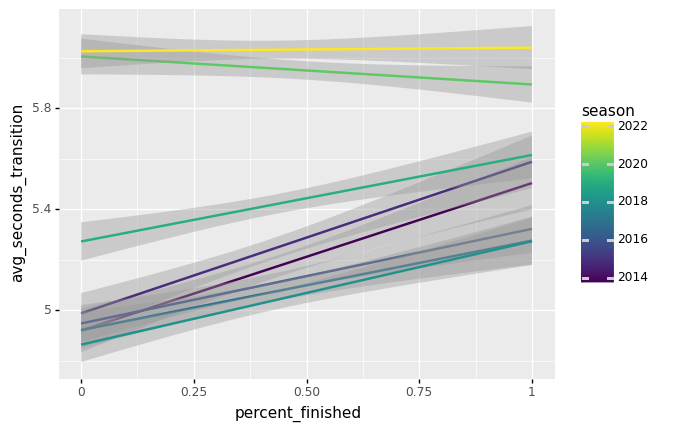

<ggplot: (138091819036)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'avg_seconds_transition', group = 'season', color = 'season')) + geom_smooth())

Looks like we can just use a flat number for seconds in transition, not many possessions anyway

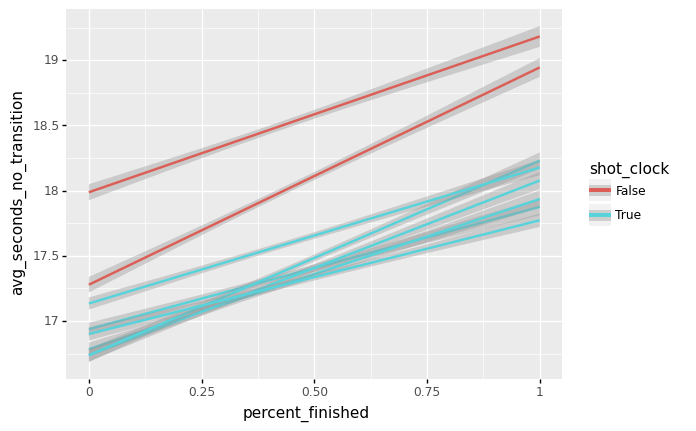

<ggplot: (138091688042)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'avg_seconds_no_transition', group = 'season', color = 'shot_clock')) + geom_smooth())

In [ ]:
def previous_seconds(date):
    window_start = datetime.strftime(datetime.strptime(date, '%Y-%m-%d') - timedelta(days = 15), '%Y-%m-%d')
    filter_df = agg_df[(agg_df['date'] >= window_start) & (agg_df['date'] < date)]
    return filter_df['avg_seconds_no_transition'].mean()

def additive_seconds(date, x):
    return previous_seconds(date) + x

def multiplicative_seconds(date, x):
    return previous_seconds(date) * x

def test_date_seconds(date):
    type_list = []
    x_list = []
    estimate_list = []
    for x in [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]:
        add_seconds_estimate = additive_seconds(date, x)
        type_list.append('additive')
        x_list.append(x)
        estimate_list.append(add_seconds_estimate)
    for x in [1.003, 1.00325, 1.0035, 1.00375, 1.004]:
        mult_seconds_estimate = multiplicative_seconds(date, x)
        type_list.append('multiplicative')
        x_list.append(x)
        estimate_list.append(mult_seconds_estimate)
    return type_list, x_list, estimate_list

def test_season_seconds(season):
    season_df = agg_df[(agg_df['season'] == season) & (agg_df['date'] > str(season - 1) + '-11-30')]
    result_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
    for d in season_df['date'].unique():
        date_df = season_df[season_df['date'] == d]
        if len(date_df) >= 40:
            date_seconds = date_df['avg_seconds_no_transition'].mean()
            type_list, x_list, estimate_list = test_date_seconds(d)
            result_df = pd.concat([result_df, pd.DataFrame({'Date': [d for i in range(len(type_list))],
                                                             'Type': type_list,
                                                             'X': x_list,
                                                             'Estimate': estimate_list,
                                                             'Actual': [date_seconds for i in range(len(type_list))]})])
    return result_df

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_seconds(s)])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X      
additive        0.05000   -0.002742
                0.06000    0.007258
                0.07000    0.017258
                0.08000    0.027258
                0.09000    0.037258
                0.10000    0.047258
multiplicative  1.00300    0.000221
                1.00325    0.004635
                1.00350    0.009049
                1.00375    0.013462
                1.00400    0.017876
Name: error, dtype: float64

In [ ]:
estimate_df.groupby(['Type', 'X'])['squared_error'].mean()

Type            X      
additive        0.05000    0.054914
                0.06000    0.054959
                0.07000    0.055204
                0.08000    0.055649
                0.09000    0.056295
                0.10000    0.057140
multiplicative  1.00300    0.054924
                1.00325    0.054947
                1.00350    0.055009
                1.00375    0.055111
                1.00400    0.055251
Name: squared_error, dtype: float64

seconds = last 14 day seconds + 0.0525

In [ ]:
def previous_ppp(date, shot_type):
    window_start = datetime.strftime(datetime.strptime(date, '%Y-%m-%d') - timedelta(days = 15), '%Y-%m-%d')
    filter_df = agg_df[(agg_df['date'] >= window_start) & (agg_df['date'] < date)]
    return filter_df['ppp_' + shot_type].mean()

def additive_ppp(date, x, shot_type):
    return previous_ppp(date, shot_type) + x

def multiplicative_ppp(date, x, shot_type):
    return previous_ppp(date, shot_type) * x

def test_date_ppp(date, shot_type):
    type_list = []
    x_list = []
    estimate_list = []
    for x in [0.0035, 0.004, 0.0045, 0.005]:
        add_ppp_estimate = additive_ppp(date, x, shot_type)
        type_list.append('additive')
        x_list.append(x)
        estimate_list.append(add_ppp_estimate)
    for x in [1.004, 1.0045, 1.005]:
        mult_ppp_estimate = multiplicative_ppp(date, x, shot_type)
        type_list.append('multiplicative')
        x_list.append(x)
        estimate_list.append(mult_ppp_estimate)
    return type_list, x_list, estimate_list

def test_season_ppp(season, shot_type):
    season_df = agg_df[(agg_df['season'] == season) & (agg_df['date'] > str(season - 1) + '-11-30')]
    result_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
    for d in season_df['date'].unique():
        date_df = season_df[season_df['date'] == d]
        if len(date_df) >= 40:
            date_ppp = date_df['ppp_' + shot_type].mean()
            type_list, x_list, estimate_list = test_date_ppp(d, shot_type)
            result_df = pd.concat([result_df, pd.DataFrame({'Date': [d for i in range(len(type_list))],
                                                             'Type': type_list,
                                                             'X': x_list,
                                                             'Estimate': estimate_list,
                                                             'Actual': [date_ppp for i in range(len(type_list))]})])
    return result_df

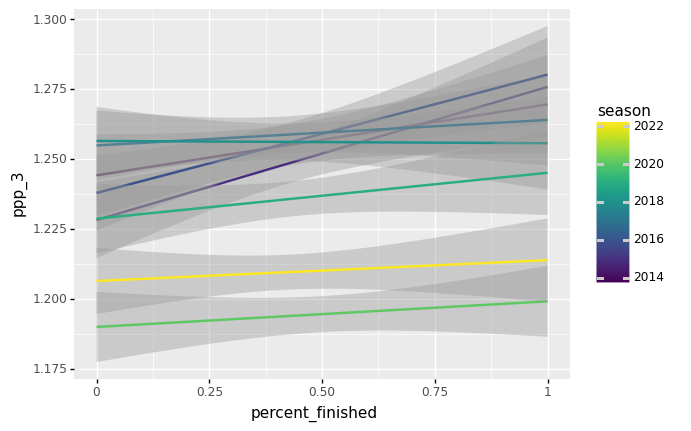

<ggplot: (191022832409)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'ppp_3', group = 'season', color = 'season')) + geom_smooth())

Seems like we can just use a constant for PPP on 3 pointers

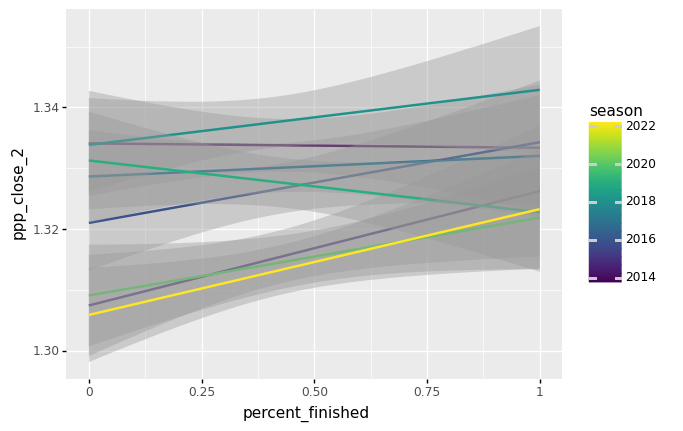

<ggplot: (191022980115)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'ppp_close_2', group = 'season', color = 'season')) + geom_smooth())

Seems like we can just use a constant for PPP on close 2s

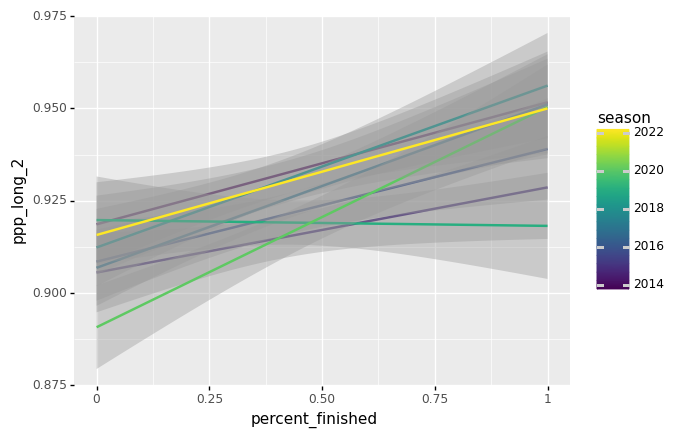

<ggplot: (191023028101)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'ppp_long_2', group = 'season', color = 'season')) + geom_smooth())

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_ppp(s, 'long_2')])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X      
additive        0.00000   -0.001082
                0.00100   -0.000082
                0.00200    0.000918
                0.00300    0.001918
multiplicative  1.00100   -0.000155
                1.00125    0.000077
                1.00150    0.000309
Name: error, dtype: float64

In [ ]:
estimate_df.groupby(['Type', 'X'])['squared_error'].mean()

Type            X      
additive        0.00000    0.000830
                0.00100    0.000829
                0.00200    0.000830
                0.00300    0.000833
multiplicative  1.00100    0.000829
                1.00125    0.000829
                1.00150    0.000829
Name: squared_error, dtype: float64

Long 2 PPP = Previous 14 days Long 2 PPP * 1.00125

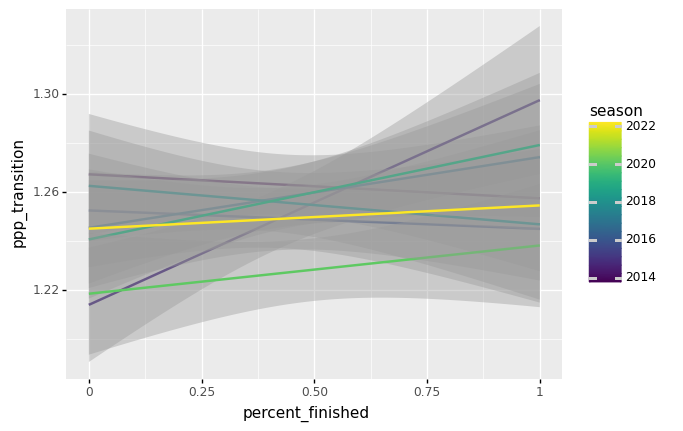

<ggplot: (191020573666)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'ppp_transition', group = 'season', color = 'season')) + geom_smooth())

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_ppp(s, 'transition')])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X      
additive        0.00000    0.001075
                0.00100    0.002075
                0.00200    0.003075
                0.00300    0.004075
multiplicative  1.00100    0.002328
                1.00125    0.002641
                1.00150    0.002954
Name: error, dtype: float64

Seems like we should just use a constant for PPP on transition

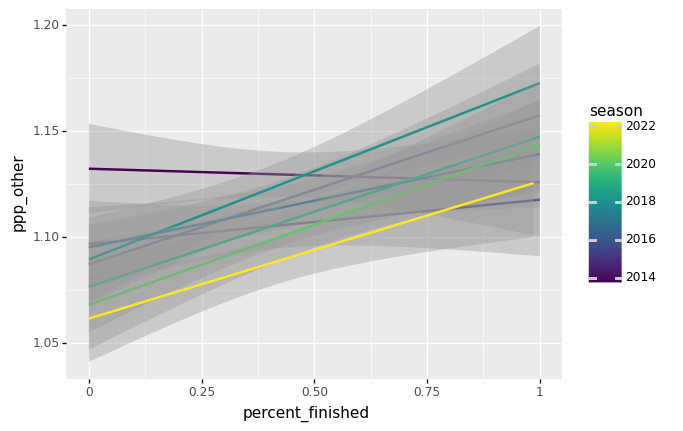

<ggplot: (135500926865)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'ppp_other', group = 'season', color = 'season')) + geom_smooth())

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_ppp(s, 'other')])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X     
additive        0.0035   -0.001004
                0.0040   -0.000504
                0.0045   -0.000004
                0.0050    0.000496
multiplicative  1.0040   -0.000047
                1.0045    0.000510
                1.0050    0.001068
Name: error, dtype: float64

In [ ]:
estimate_df.groupby(['Type', 'X'])['squared_error'].mean()

Type            X     
additive        0.0035    0.003010
                0.0040    0.003010
                0.0045    0.003009
                0.0050    0.003010
multiplicative  1.0040    0.003011
                1.0045    0.003012
                1.0050    0.003013
Name: squared_error, dtype: float64

Other PPP = Previous 14 days Other PPP + 0.0045

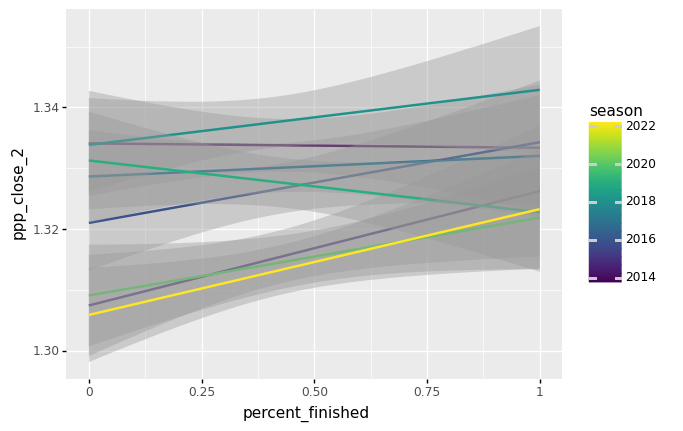

<ggplot: (191191479679)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'ppp_close_2', group = 'season', color = 'season')) + geom_smooth())

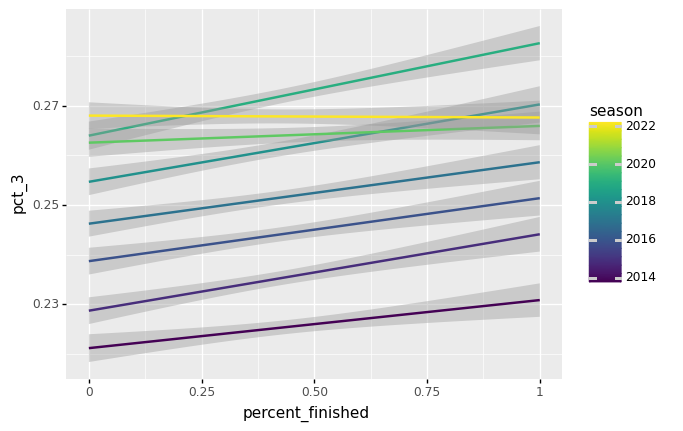

<ggplot: (122252955007)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'pct_3', group = 'season', color = 'season')) + geom_smooth())

In [ ]:
def previous_pct_poss(date, shot_type):
    window_start = datetime.strftime(datetime.strptime(date, '%Y-%m-%d') - timedelta(days = 15), '%Y-%m-%d')
    filter_df = agg_df[(agg_df['date'] >= window_start) & (agg_df['date'] < date)]
    return filter_df['pct_' + shot_type].mean()

def additive_pct_poss(date, x, shot_type):
    return previous_pct_poss(date, shot_type) + x

def multiplicative_pct_poss(date, x, shot_type):
    return previous_pct_poss(date, shot_type) / x

def test_date_pct_poss(date, shot_type):
    type_list = []
    x_list = []
    estimate_list = []
    for x in [-0.0005, -0.00075, -0.001]:
        add_pct_poss_estimate = additive_pct_poss(date, x, shot_type)
        type_list.append('additive')
        x_list.append(x)
        estimate_list.append(add_pct_poss_estimate)
    for x in [1.01, 1.0125, 1.015]:
        mult_pct_poss_estimate = multiplicative_pct_poss(date, x, shot_type)
        type_list.append('multiplicative')
        x_list.append(x)
        estimate_list.append(mult_pct_poss_estimate)
    return type_list, x_list, estimate_list

def test_season_pct_poss(season, shot_type):
    season_df = agg_df[(agg_df['season'] == season) & (agg_df['date'] > str(season - 1) + '-11-30')]
    result_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
    for d in season_df['date'].unique():
        date_df = season_df[season_df['date'] == d]
        if len(date_df) >= 40:
            date_pct_poss = 100 * date_df['pct_' + shot_type].mean()
            type_list, x_list, estimate_list = test_date_pct_poss(d, shot_type)
            result_df = pd.concat([result_df, pd.DataFrame({'Date': [d for i in range(len(type_list))],
                                                             'Type': type_list,
                                                             'X': x_list,
                                                             'Estimate': [e * 100 for e in estimate_list],
                                                             'Actual': [date_pct_poss for i in range(len(type_list))]})])
    return result_df

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_pct_poss(s, '3')])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X      
additive        0.00020   -0.000081
                0.00030    0.000019
                0.00040    0.000119
                0.00050    0.000219
multiplicative  1.00050   -0.000155
                1.00075   -0.000091
                1.00100   -0.000028
                1.00125    0.000035
Name: error, dtype: float64

In [ ]:
estimate_df.groupby(['Type', 'X'])['squared_error'].mean()

Type            X      
additive        0.00020    0.000044
                0.00030    0.000044
                0.00040    0.000044
                0.00050    0.000044
multiplicative  1.00050    0.000044
                1.00075    0.000044
                1.00100    0.000044
                1.00125    0.000044
Name: squared_error, dtype: float64

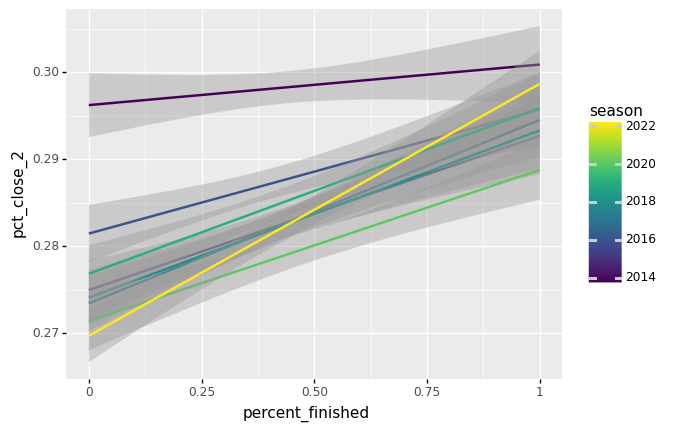

<ggplot: (122252719120)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'pct_close_2', group = 'season', color = 'season')) + geom_smooth())

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_pct_poss(s, 'close_2')])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X      
additive        0.00100   -0.003998
                0.00125    0.021002
                0.00150    0.046002
                0.00175    0.071002
                0.00200    0.096002
multiplicative  1.00300   -0.018241
                1.00325   -0.011094
                1.00350   -0.003948
                1.00375    0.003199
                1.00400    0.010345
Name: error, dtype: float64

In [ ]:
estimate_df.groupby(['Type', 'X'])['squared_error'].mean()

Type            X      
additive        0.00100    0.788911
                0.00125    0.789336
                0.00150    0.791011
                0.00175    0.793936
                0.00200    0.798111
multiplicative  1.00300    0.789765
                1.00325    0.789600
                1.00350    0.789538
                1.00375    0.789578
                1.00400    0.789720
Name: squared_error, dtype: float64

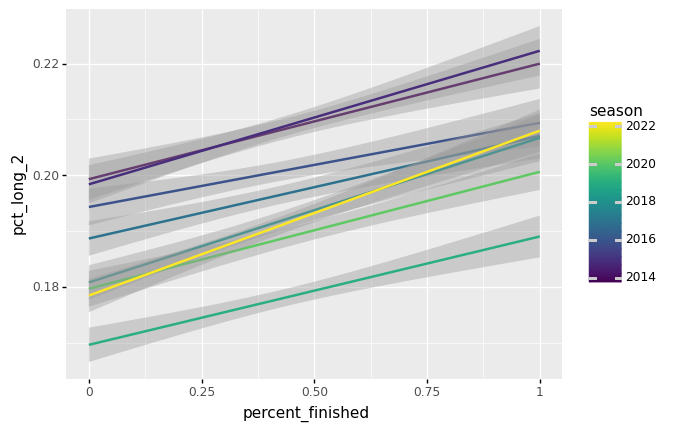

<ggplot: (122335207536)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'pct_long_2', group = 'season', color = 'season')) + geom_smooth())

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_pct_poss(s, 'long_2')])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X      
additive        0.00100   -0.052092
                0.00125   -0.027092
                0.00150   -0.002092
                0.00175    0.022908
                0.00200    0.047908
multiplicative  1.00700   -0.015084
                1.00750   -0.005298
                1.00800    0.004489
                1.00850    0.014275
                1.00900    0.024061
Name: error, dtype: float64

In [ ]:
estimate_df.groupby(['Type', 'X'])['squared_error'].mean()

Type            X      
additive        0.00100    0.710976
                0.00125    0.708996
                0.00150    0.708267
                0.00175    0.708787
                0.00200    0.710557
multiplicative  1.00700    0.708843
                1.00750    0.708673
                1.00800    0.708695
                1.00850    0.708909
                1.00900    0.709315
Name: squared_error, dtype: float64

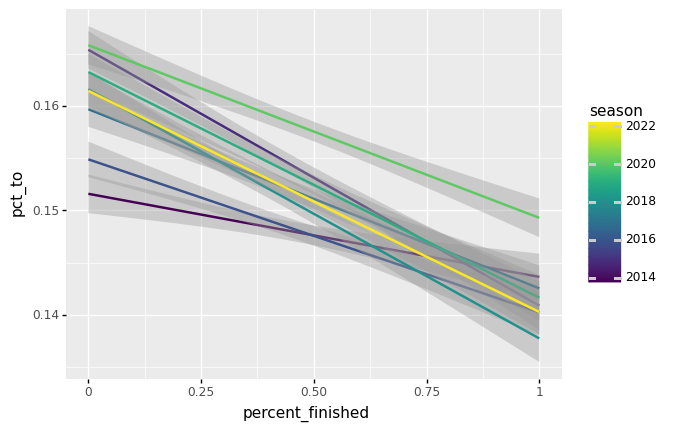

<ggplot: (122335915761)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'pct_to', group = 'season', color = 'season')) + geom_smooth())

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_pct_poss(s, 'to')])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X       
additive        -0.00200   -0.067439
                -0.00170   -0.037439
                -0.00160   -0.027439
                -0.00150   -0.017439
                -0.00140   -0.007439
                -0.00130    0.002561
                -0.00125    0.007561
multiplicative   1.00700    0.026565
                 1.00775    0.015296
                 1.00800    0.011543
                 1.00825    0.007793
                 1.00850    0.004044
                 1.00875    0.000296
                 1.00900   -0.003449
Name: error, dtype: float64

In [ ]:
estimate_df.groupby(['Type', 'X'])['squared_error'].mean()

Type            X       
additive        -0.00200    0.235752
                -0.00170    0.232606
                -0.00160    0.231957
                -0.00150    0.231508
                -0.00140    0.231259
                -0.00130    0.231210
                -0.00125    0.231261
multiplicative   1.00700    0.231897
                 1.00775    0.231425
                 1.00800    0.231324
                 1.00825    0.231252
                 1.00850    0.231207
                 1.00875    0.231191
                 1.00900    0.231203
Name: squared_error, dtype: float64

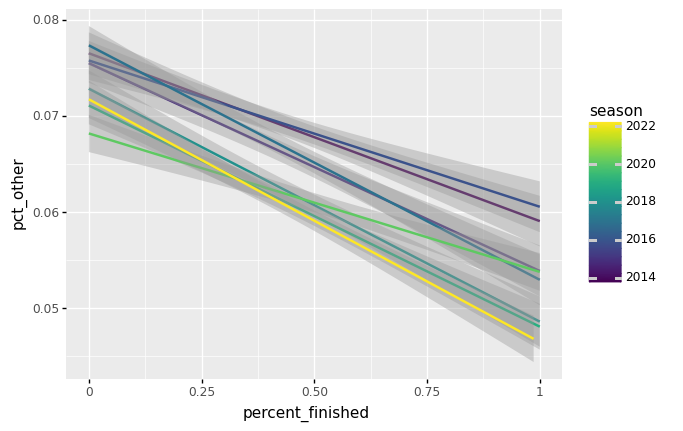

<ggplot: (122336116444)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'pct_other', group = 'season', color = 'season')) + geom_smooth())

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_pct_poss(s, 'other')])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X       
additive        -0.00100   -0.020563
                -0.00075    0.004437
                -0.00050    0.029437
multiplicative   1.01000    0.016695
                 1.01250    0.001203
                 1.01500   -0.014213
Name: error, dtype: float64

In [ ]:
estimate_df.groupby(['Type', 'X'])['squared_error'].mean()

Type            X       
additive        -0.00100    0.273257
                -0.00075    0.272854
                -0.00050    0.273701
multiplicative   1.01000    0.272223
                 1.01250    0.271735
                 1.01500    0.271730
Name: squared_error, dtype: float64

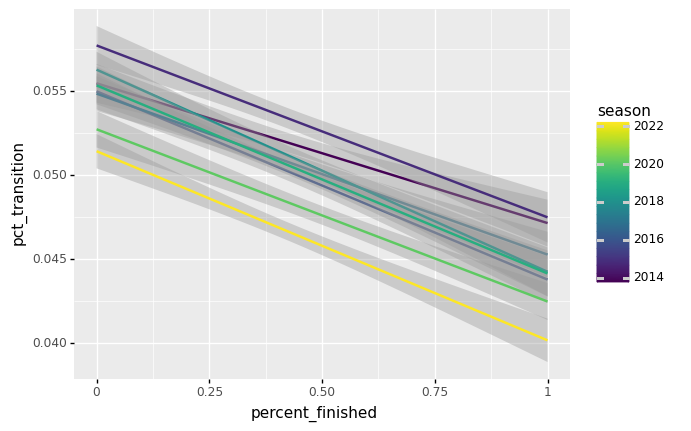

<ggplot: (122336319675)>

In [ ]:
(ggplot(agg_df, aes(x = 'percent_finished', y = 'pct_transition', group = 'season', color = 'season')) + geom_smooth())

In [ ]:
estimate_df = pd.DataFrame({'Date': [],
                             'Type': [],
                             'X': [],
                             'Estimate': [],
                             'Actual': []})
for s in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]:
    estimate_df = pd.concat([estimate_df, test_season_pct_poss(s, 'transition')])

In [ ]:
estimate_df['error'] = estimate_df['Estimate'] - estimate_df['Actual']
estimate_df['squared_error'] = estimate_df['error'].mul(estimate_df['error'])
estimate_df.groupby(['Type', 'X'])['error'].mean()

Type            X       
additive        -0.00100   -0.030271
                -0.00075   -0.005271
                -0.00050    0.019729
multiplicative   1.01000    0.020138
                 1.01250    0.007893
                 1.01500   -0.004291
Name: error, dtype: float64

In [ ]:
estimate_df.groupby(['Type', 'X'])['squared_error'].mean()

Type            X       
additive        -0.00100    0.099744
                -0.00075    0.098855
                -0.00050    0.099217
multiplicative   1.01000    0.099220
                 1.01250    0.098877
                 1.01500    0.098834
Name: squared_error, dtype: float64

### Summary

Poss = Previous 14 days poss / 1.00285

Seconds per transition = Previous 14 days seconds per transition

Seconds no transition = Previous 14 days seconds no transition + 0.0525

3 PPP = Previous 14 days 3 PPP

Close 2 PPP = Previous 14 days close 2 PPP

Long 2 PPP = Previous 14 days long 2 PPP + 0.002

Transition PPP = Previous 14 days transition PPP

Other PPP = Previous 14 days other PPP + 0.0045

TO PPP = 0

3 % Poss = Previous 14 days 3 % poss + 0.0003

Close 2 % Poss = Previous 14 days close % poss + 0.001

Long 2 % Poss = Previous 14 days long 2 % poss + 0.0015

Transition % Poss = Previous 14 days transition % poss - 0.0005

Other % Poss = Previous 14 days Other % poss - 0.00075

TO % Poss = Previous 14 days TO % poss - 0.0013

When at beginning of season (no previous days), use start of last season's numbers

## Shot Shrinkage

In [ ]:
pbp['period_temp'] = 1
pbp.loc[pbp['period'] > 1, 'period_temp'] = 2

In [ ]:
def count(x):
    return len(x)

shots = pbp[pbp['shot_type'].isin(['Long Two', 'Three', 'Dunk', 'Free Throw', 'Layup'])].groupby(
    ['game_id', 'period_temp', 'shot_type']
).agg(
    expected_points = ('expected_points', sum),
    result_points = ('result_points', sum),
    num_shots = ('id', count)
).reset_index()

In [ ]:
shots['expected_points_per_shot'] = shots['expected_points'].div(shots['num_shots'])
shots['result_points_per_shot'] = shots['result_points'].div(shots['num_shots'])

In [ ]:
first_half = shots[(shots['period_temp'] == 1) & (((shots['shot_type'] == 'Dunk') & (shots['num_shots'] > 2)) | (shots['num_shots'] > 9))]
second_half = shots[(shots['period_temp'] == 2) & (((shots['shot_type'] == 'Dunk') & (shots['num_shots'] > 2)) | (shots['num_shots'] > 9))]

In [ ]:
shots = pd.merge(first_half, second_half, how = 'inner', on = ['shot_type', 'game_id'], suffixes=('_1', '_2'))
shots.head()

,game_id,period_temp_1,shot_type,expected_points_1,result_points_1,num_shots_1,expected_points_per_shot_1,result_points_per_shot_1,period_temp_2,expected_points_2,result_points_2,num_shots_2,expected_points_per_shot_2,result_points_per_shot_2
0,400496834,1,Dunk,9.907799,10,5,1.981560,2.000000,2,7.844787,8,4,1.961197,2.000000
1,400496834,1,Free Throw,15.144017,16,22,0.688364,0.727273,2,12.362521,13,19,0.650659,0.684211
2,400496834,1,Layup,17.432271,14,17,1.025428,0.823529,2,12.481145,16,11,1.134650,1.454545
3,400496834,1,Long Two,11.564647,14,18,0.642480,0.777778,2,13.146400,10,18,0.730356,0.555556
4,400496834,1,Three,23.151761,30,22,1.052353,1.363636,2,19.525825,24,20,0.976291,1.200000


In [ ]:
def weighted_shots(exp_weight):
    shots['predicted_points_per_shot_2'] = exp_weight * shots['expected_points_per_shot_1'] + (1 - exp_weight) * shots['result_points_per_shot_1']
    shots['predicted_points_per_shot_1'] = exp_weight * shots['expected_points_per_shot_2'] + (1 - exp_weight) * shots['result_points_per_shot_2']

    shots['error_2'] = shots['predicted_points_per_shot_2'] - shots['result_points_per_shot_2']
    shots['error_1'] = shots['predicted_points_per_shot_1'] - shots['result_points_per_shot_1']

    error_df = shots.melt(
            id_vars = 'shot_type',
            value_vars = ['error_1', 'error_2'],
            value_name = 'error'
    )[['shot_type', 'error']]
    
    error_df['squared_error'] = error_df['error'].mul(error_df['error'])
    error_df['exp_weight'] = exp_weight

    return error_df.groupby('shot_type').mean().reset_index()

In [ ]:
results_df = pd.DataFrame()

for w in range(21):
    results_df = pd.concat([results_df, weighted_shots(w / 20)])

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
results_df[results_df['shot_type'] == 'Dunk'].sort_values(['shot_type', 'exp_weight'])

,shot_type,error,squared_error,exp_weight
0,Dunk,-0.00000,0.21041,0.00000
0,Dunk,-0.00397,0.20154,0.05000
0,Dunk,-0.00794,0.19355,0.10000
0,Dunk,-0.01190,0.18644,0.15000
0,Dunk,-0.01587,0.18022,0.20000
0,Dunk,-0.01984,0.17488,0.25000
0,Dunk,-0.02381,0.17043,0.30000
0,Dunk,-0.02777,0.16685,0.35000
0,Dunk,-0.03174,0.16416,0.40000
0,Dunk,-0.03571,0.16236,0.45000


Looks like the weights should be almost one for each (though predicting future games based on more data may behave differently), dunks are weird because there's such a small sample during the game

## Score Differential

In [ ]:
df = poss[(abs(poss['possession_score_differential']) <= 25) & (poss['foul_stage'] == 0) & (poss['garbage_time'] == 0)]

<AxesSubplot:xlabel='possession_score_differential'>

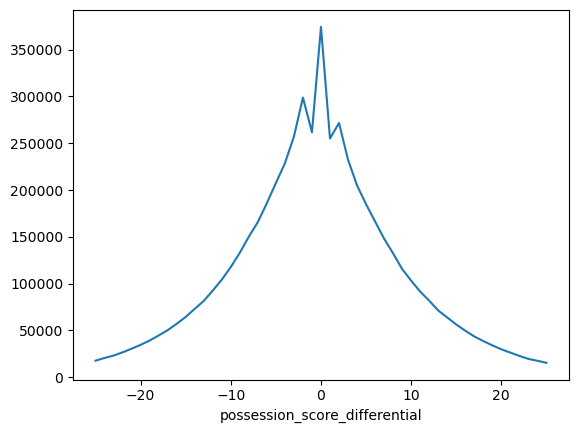

In [ ]:
df.groupby('possession_score_differential').size().plot()

In [ ]:
game_avg = df.groupby(['game_id', 'team_id_with_poss', 'class'])['result_points'].mean().reset_index().rename(columns = {'result_points': 'ppp'})
df = pd.merge(df, game_avg, on = ['game_id', 'team_id_with_poss', 'class'])
df.head()

,season,game_id,date,poss_id,team_id_with_poss,previous_possession_end,possession_score_differential,expected_points,result_points,garbage_time,foul_stage,seconds_elapsed,first_event,seconds_elapsed_before_first_event,opp_id,class,transition,ppp
0,2014,400496834,2013-11-08,400496834001.00000,120.00000,Other,0.00000,0.83987,0,0,0,16.00000,Long Two,16.00000,41.00000,long 2,False,0.70588
1,2014,400496834,2013-11-08,400496834003.00000,120.00000,DREB,0.00000,0.45074,0,0,0,30.00000,Long Two,30.50000,41.00000,long 2,False,0.70588
2,2014,400496834,2013-11-08,400496834009.00000,120.00000,Made Shot,-5.00000,0.69023,2,0,0,26.00000,Long Two,26.00000,41.00000,long 2,False,0.70588
3,2014,400496834,2013-11-08,400496834011.00000,120.00000,Made Shot,-6.00000,0.55443,2,0,0,16.00000,Long Two,16.00000,41.00000,long 2,False,0.70588
4,2014,400496834,2013-11-08,400496834019.00000,120.00000,Made Shot,-10.00000,0.44958,0,0,0,19.00000,Long Two,19.00000,41.00000,long 2,False,0.70588


In [ ]:
df['residual_points'] = df['result_points'] - df['ppp']
df['expected_residual_points'] = df['expected_points'] - df['ppp']

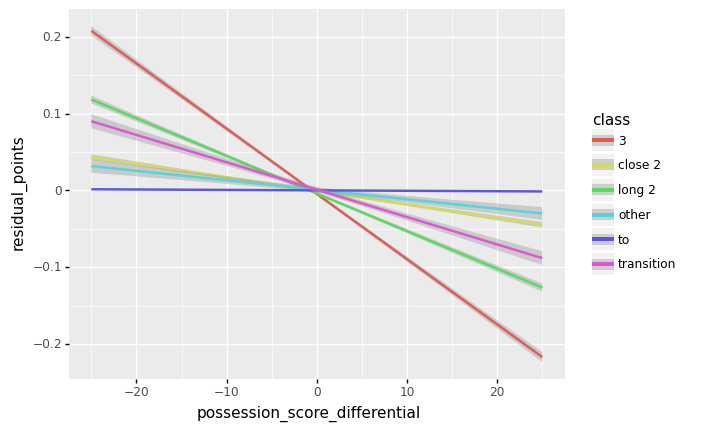

<ggplot: (138737969333)>

In [ ]:
(ggplot(df, aes(x = 'possession_score_differential', y = 'residual_points', group = 'class', color = 'class')) + geom_smooth())

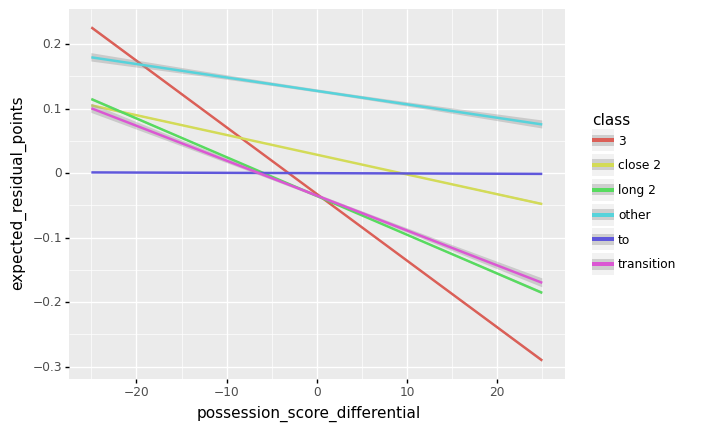

<ggplot: (138983798260)>

In [ ]:
(ggplot(df, aes(x = 'possession_score_differential', y = 'expected_residual_points', group = 'class', color = 'class')) + geom_smooth())

In [ ]:
game_prop = df.groupby(
    ['game_id', 'team_id_with_poss'], 
    as_index = False
)['class'].value_counts(normalize=True).pivot(
    index = ['game_id', 'team_id_with_poss'],
    columns = 'class', 
    values = 'proportion'
).reset_index()
df = pd.merge(df, game_prop, on = ['game_id', 'team_id_with_poss'])
df.head()

,season,game_id,date,poss_id,team_id_with_poss,previous_possession_end,possession_score_differential,expected_points,result_points,garbage_time,...,transition_x,ppp,residual_points,expected_residual_points,3,close 2,long 2,other,to,transition_y
0,2014,400496834,2013-11-08,400496834001.00000,120.00000,Other,0.00000,0.84161,0,0,...,False,0.70588,-0.70588,0.13572,0.24324,0.28378,0.22973,0.02703,0.16216,0.05405
1,2014,400496834,2013-11-08,400496834003.00000,120.00000,DREB,0.00000,0.45632,0,0,...,False,0.70588,-0.70588,-0.24957,0.24324,0.28378,0.22973,0.02703,0.16216,0.05405
2,2014,400496834,2013-11-08,400496834009.00000,120.00000,Made Shot,-5.00000,0.70170,2,0,...,False,0.70588,1.29412,-0.00419,0.24324,0.28378,0.22973,0.02703,0.16216,0.05405
3,2014,400496834,2013-11-08,400496834011.00000,120.00000,Made Shot,-6.00000,0.57132,2,0,...,False,0.70588,1.29412,-0.13456,0.24324,0.28378,0.22973,0.02703,0.16216,0.05405
4,2014,400496834,2013-11-08,400496834019.00000,120.00000,Made Shot,-10.00000,0.45887,0,0,...,False,0.70588,-0.70588,-0.24701,0.24324,0.28378,0.22973,0.02703,0.16216,0.05405


In [ ]:
df['to_residual'] = 1 - df['to']
df['3_residual'] = 1 - df['3']
df['long_2_residual'] = 1 - df['long 2']
df['close_2_residual'] = 1 - df['close 2']
df['transition_residual'] = 1 - df['transition_y']
df['other_residual'] = 1 - df['other']

df.loc[df['class'] != 'to', 'to_residual'] = 0 - df.loc[df['class'] != 'to', 'to']
df.loc[df['class'] != '3', '3_residual'] = 0 - df.loc[df['class'] != '3', '3']
df.loc[df['class'] != 'long 2', 'long_2_residual'] = 0 - df.loc[df['class'] != 'long 2', 'long 2']
df.loc[df['class'] != 'close 2', 'close_2_residual'] = 0 - df.loc[df['class'] != 'close 2', 'close 2']
df.loc[df['class'] != 'transition', 'transition_residual'] = 0 - df.loc[df['class'] != 'transition', 'transition_y']
df.loc[df['class'] != 'other', 'other_residual'] = 0 - df.loc[df['class'] != 'other', 'other']

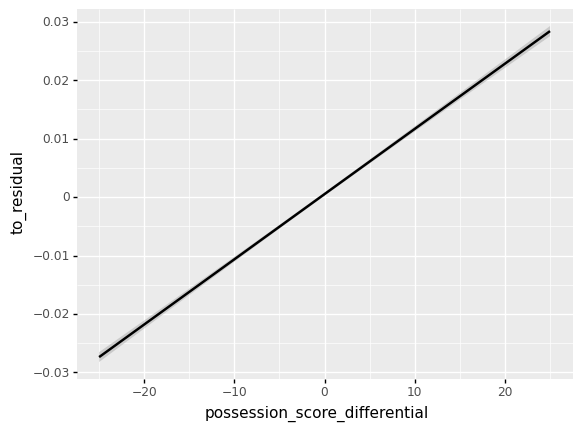

<ggplot: (137778669867)>

In [ ]:
(ggplot(df, aes(x = 'possession_score_differential', y = 'to_residual')) + geom_smooth())

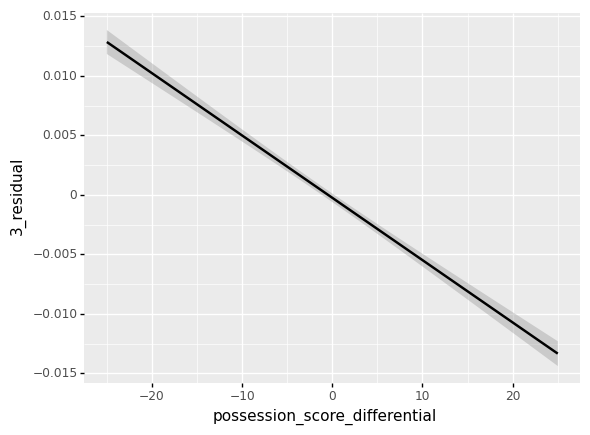

<ggplot: (137778652004)>

In [ ]:
(ggplot(df, aes(x = 'possession_score_differential', y = '3_residual')) + geom_smooth())

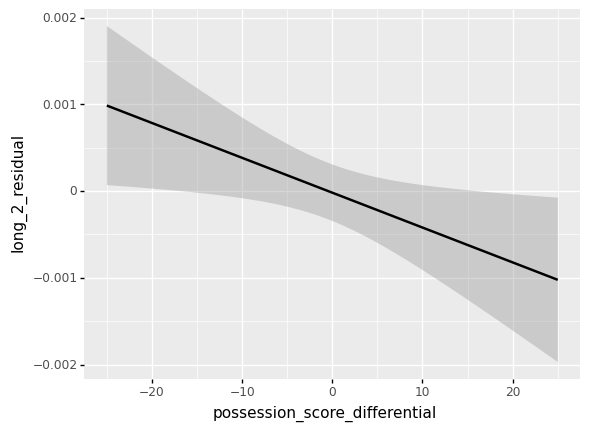

<ggplot: (138091839464)>

In [ ]:
(ggplot(df, aes(x = 'possession_score_differential', y = 'long_2_residual')) + geom_smooth())

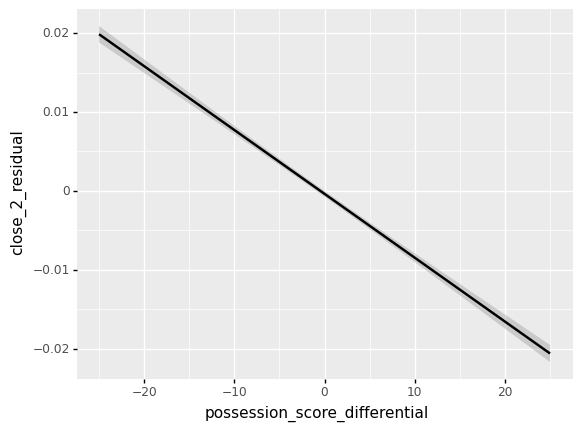

<ggplot: (137778652679)>

In [ ]:
(ggplot(df, aes(x = 'possession_score_differential', y = 'close_2_residual')) + geom_smooth())

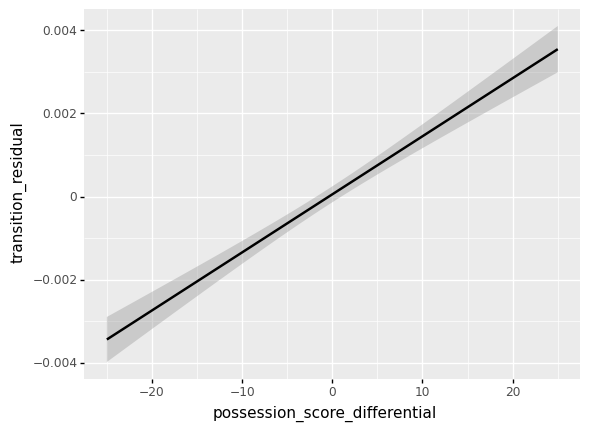

<ggplot: (138091812229)>

In [ ]:
(ggplot(df, aes(x = 'possession_score_differential', y = 'transition_residual')) + geom_smooth())

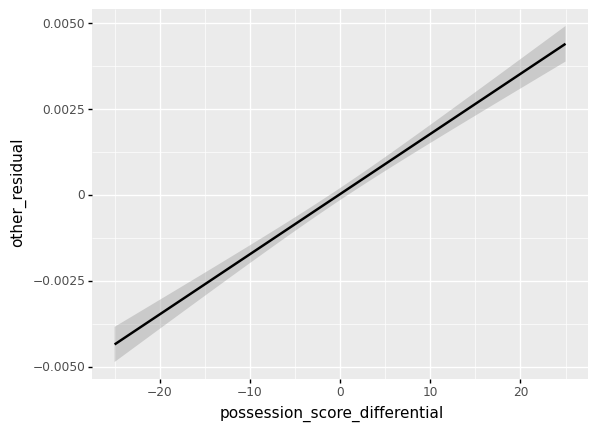

<ggplot: (138170887051)>

In [ ]:
(ggplot(df, aes(x = 'possession_score_differential', y = 'other_residual')) + geom_smooth())

1. Fit the above lines with no intercept
2. Shrink the slope back to zero using a parameter 
3. Adjust the result points in the possession using the regression

## Diff between PBP possessions and possession formula

In [ ]:
def count(x):
    return len(x)

pbp_poss = poss.groupby(
    ['game_id']
).agg(
    pbp_total_poss = ('poss_id', count)
).reset_index()

In [ ]:
games = pd.read_csv('games_clean.csv')
games['formula_total_poss'] = games['team_poss'] + games['opp_poss']
game_poss = games[['season', 'game_id', 'formula_total_poss']]

,game_id,date,season,location,venue_full_name,noncon,postseason,minutes,team_id,opp_id,team_name,opp_name,team_poss,opp_poss,team_score,opp_score
0,400496834,2013-11-08,2014.0,N,Barclays Center,1,0,40,41.0,120.0,UConn,Maryland,68.11,72.16,78.0,77.0
1,400496834,2013-11-08,2014.0,N,Barclays Center,1,0,40,120.0,41.0,Maryland,UConn,72.16,68.11,77.0,78.0
2,400496835,2013-11-09,2014.0,A,Fertitta Center,1,0,40,326.0,248.0,Texas State,Houston,66.93,68.69,70.0,76.0
3,400496835,2013-11-09,2014.0,H,Fertitta Center,1,0,40,248.0,326.0,Houston,Texas State,68.69,66.93,76.0,70.0
4,400496836,2013-11-09,2014.0,A,Jersey Mikeâs Arena,1,0,40,50.0,164.0,Florida A&M,Rutgers,87.22,76.45,84.0,92.0


In [ ]:
poss_merge = pd.merge(game_poss, pbp_poss, how = 'inner', on = 'game_id')
poss_merge['diff'] = poss_merge['formula_total_poss'] - poss_merge['pbp_total_poss']

In [ ]:
pbp['next_play_within_40_seconds'] = 1
pbp.loc[(pbp['seconds_remaining_game_clock'] - pbp.groupby(['period', 'game_id'])['seconds_remaining_game_clock'].shift(-1) > 40), 'next_play_within_40_seconds'] = 0

full_games = pbp.groupby('game_id')['next_play_within_40_seconds'].min().reset_index()
full_games = full_games[full_games['next_play_within_40_seconds'] == 1]

In [ ]:
poss_merge = poss_merge.merge(full_games, how = 'inner', on = 'game_id')

(-20.0, 10.0)

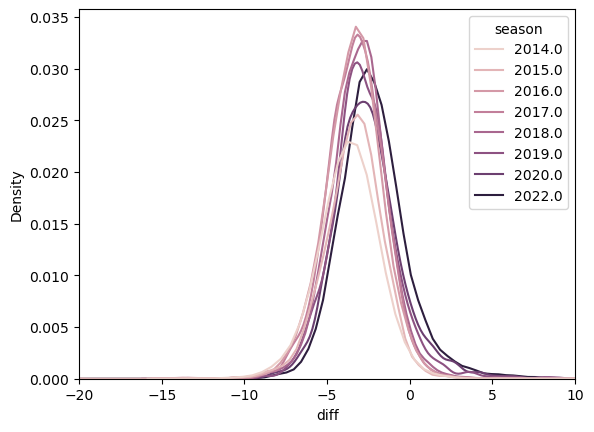

In [ ]:
ax = sns.kdeplot(data=poss_merge, x='diff', hue='season')
ax.set_xlim(-20, 10)

(-20.0, 10.0)

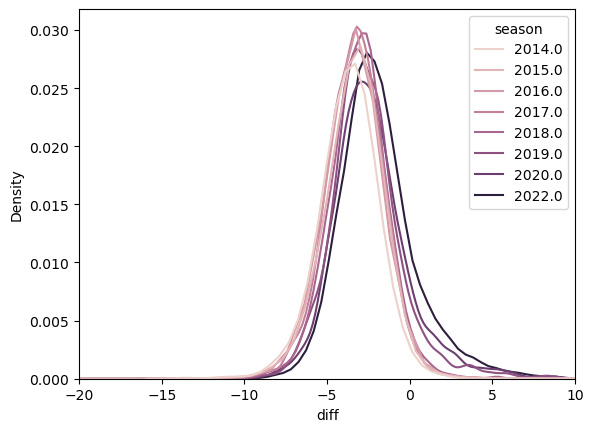

In [ ]:
ax = sns.kdeplot(data=poss_merge, x='diff', hue='season')
ax.set_xlim(-20, 10)

(-20.0, 10.0)

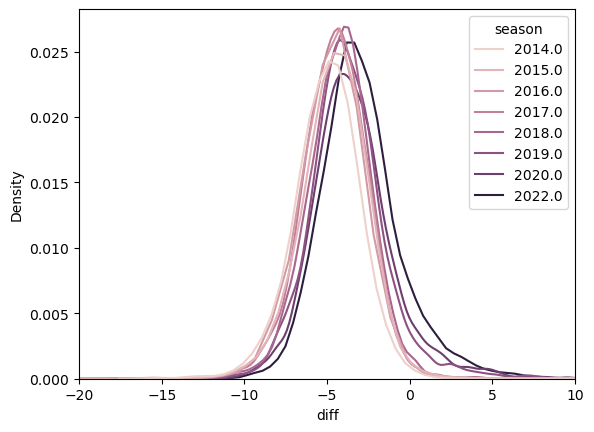

In [ ]:
ax = sns.kdeplot(data=poss_merge, x='diff', hue='season')
ax.set_xlim(-20, 10)

In [ ]:
poss_merge['diff'].describe()

count    65904.000000
mean        -3.001855
std          2.435990
min        -27.140000
25%         -4.200000
50%         -3.080000
75%         -1.910000
max         96.620000
Name: diff, dtype: float64

In [ ]:
poss_merge['diff'].describe()

count    86418.000000
mean        -4.074546
std          2.946464
min       -129.000000
25%         -5.520000
50%         -4.160000
75%         -2.880000
max        108.440000
Name: diff, dtype: float64

(0.0, 50.0)

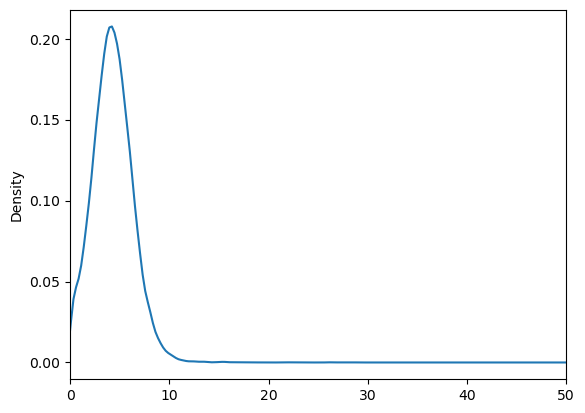

In [ ]:
poss_merge['abs_diff'] = abs(poss_merge['diff'])
ax = poss_merge['abs_diff'].plot(kind = 'kde')
ax.set_xlim(0, 50)

Probably should calculate some weighted average of the two, but only trust formula when they differ by more than 10

Weight can be 50% at zero, 0% at diff of 10+, linear in between

Need to remember that the 2023 rule of 1 shot flopping Technicals will influence possession formula

## HCA

Weight global, conference, and team's HCA from previous year to predict current year HCA

In [37]:
games = pd.read_csv('games_clean.csv')
games.head()

,game_id,date,season,location,venue_full_name,venue_id,noncon,postseason,minutes,team_id,opp_id,team_name,opp_name,team_poss,opp_poss,team_score,opp_score
0,400496834,2013-11-08,2014.00000,N,Barclays Center,3559.00000,1,0,40,41.00000,120.00000,UConn,Maryland,68.11000,72.16000,78.00000,77.00000
1,400496834,2013-11-08,2014.00000,N,Barclays Center,3559.00000,1,0,40,120.00000,41.00000,Maryland,UConn,72.16000,68.11000,77.00000,78.00000
2,400496835,2013-11-09,2014.00000,A,Fertitta Center,2126.00000,1,0,40,326.00000,248.00000,Texas State,Houston,66.93000,68.69000,70.00000,76.00000
3,400496835,2013-11-09,2014.00000,H,Fertitta Center,2126.00000,1,0,40,248.00000,326.00000,Houston,Texas State,68.69000,66.93000,76.00000,70.00000
4,400496836,2013-11-09,2014.00000,A,Jersey Mikeâs Arena,2008.00000,1,0,40,50.00000,164.00000,Florida A&M,Rutgers,87.22000,76.45000,84.00000,92.00000


In [38]:
df = poss.merge(games[['game_id', 'noncon', 'location', 'team_id']], how = 'inner', left_on = ['game_id', 'team_id_with_poss'], right_on = ['game_id', 'team_id'])
df.head()

,season,game_id,date,poss_id,team_id_with_poss,previous_possession_end,possession_score_differential,expected_points,result_points,garbage_time,foul_stage,seconds_elapsed,first_event,seconds_elapsed_before_first_event,opp_id,class,transition,noncon,location,team_id
0,2014,400496834,2013-11-08,400496834001.00000,120.00000,Other,0.00000,0.83987,0,0,0,16.00000,Long Two,16.00000,41.00000,long 2,False,1,N,120.00000
1,2014,400496834,2013-11-08,400496834003.00000,120.00000,DREB,0.00000,0.45074,0,0,0,30.00000,Long Two,30.50000,41.00000,long 2,False,1,N,120.00000
2,2014,400496834,2013-11-08,400496834005.00000,120.00000,Charge TO,0.00000,0.00000,0,0,0,8.00000,TO,8.00000,41.00000,to,False,1,N,120.00000
3,2014,400496834,2013-11-08,400496834007.00000,120.00000,Made Shot,-3.00000,0.87247,0,0,0,30.00000,Three,25.00000,41.00000,3,False,1,N,120.00000
4,2014,400496834,2013-11-08,400496834009.00000,120.00000,Made Shot,-5.00000,0.69023,2,0,0,26.00000,Long Two,26.00000,41.00000,long 2,False,1,N,120.00000


In [39]:
df = df[(df['noncon'] == 0) & (df['location'] != 'N')]

In [40]:
df.groupby(['class', 'location'])[['result_points', 'expected_points']].mean()

result_points  expected_points
class      location                                
3          A               1.22919          1.20467
           H               1.26282          1.23744
close 2    A               1.30256          1.33973
           H               1.33778          1.36898
long 2     A               0.92620          0.89554
           H               0.95199          0.91856
other      A               1.11484          1.20701
           H               1.15825          1.23927
to         A               0.00199          0.00195
           H               0.00275          0.00258
transition A               1.22737          1.20365
           H               1.27033          1.24073

In [41]:
df.groupby(['location'])['class'].value_counts(normalize=True)

location  class     
A         close 2      0.28534
          3            0.25226
          long 2       0.20176
          to           0.15527
          other        0.05734
          transition   0.04804
H         close 2      0.29463
          3            0.25523
          long 2       0.19371
          to           0.14528
          other        0.06225
          transition   0.04889
Name: class, dtype: float64

Use previous year's HCA stats to adjust the result points and the pct of poss, no need to shrink